In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#setting graphical formats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_excel('C:/Users/preethi/Downloads/Hackathon 2018 data.xlsx')

In [3]:
df.head()

,ADC,ADMTOT,AGE,ATYPE,AWEEKEND,BDTOT,CHC,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,...,MAPP10n,MAPP11n,MAPP12n,MAPP13n,MAPP16n,HMO86,LIVRHOS,MSICHOS,TETOT,MSICBD
0,306,20410,46,3,0,425,1,0.0,0.0,1,...,1,2,2,2,2,0,0,1,0,63
1,628,35259,46,3,0,766,1,0.0,0.0,1,...,1,2,2,2,2,1,0,1,0,44
2,306,20410,47,1,0,425,1,0.0,0.0,1,...,1,2,2,2,2,0,0,1,0,63
3,628,35259,47,3,1,766,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,44
4,279,19620,79,1,0,401,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,28


In [4]:
df.columns

Index(['ADC', 'ADMTOT', 'AGE', 'ATYPE', 'AWEEKEND', 'BDTOT', 'CHC', 'CM_AIDS',
       'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF',
       'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG',
       'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS',
       'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH',
       'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE',
       'CM_WGHTLOSS', 'DISPUNIFORM', 'FEMALE', 'FTMDTF', 'FTRES', 'FTRNTF',
       'GENHOS', 'HOSPST', 'LOS', 'MEDINCSTQ', 'NCHRONIC', 'NDX', 'NPR',
       'PAY1', 'PPO86', 'RACE', 'READMIT', 'SUROPIP', 'SUROPOP', 'SUROPTOT',
       'TOTCHG_X', 'VEM', 'VisitLink', 'YEAR', 'CCI', 'PE', 'MI', 'Sepsis',
       'UTI', 'PNA', 'DVT', 'Infection', 'Cardiac', 'Surgery_Complications',
       'MAPP1n', 'MAPP2n', 'MAPP3n', 'MAPP5n', 'MAPP6n', 'MAPP7n', 'MAPP8n',
       'MAPP9n', 'MAPP10n', 'MAPP11n', 'MAPP12n', 'MAPP13n', 'MAPP16n',
       'HMO86', 'LIVRHO

In [5]:
print(df.isnull().sum())

ADC                         0
ADMTOT                      0
AGE                         0
ATYPE                       0
AWEEKEND                    0
BDTOT                       0
CHC                         0
CM_AIDS                  1773
CM_ALCOHOL               1403
CM_ANEMDEF                  0
CM_ARTH                     0
CM_BLDLOSS                  0
CM_CHF                      0
CM_CHRNLUNG                 0
CM_COAG                     0
CM_DEPRESS               1403
CM_DM                       0
CM_DMCX                     0
CM_DRUG                  1403
CM_HTN_C                    0
CM_HYPOTHY                  0
CM_LIVER                 1403
CM_LYMPH                    0
CM_LYTES                    0
CM_METS                     0
CM_NEURO                    0
CM_OBESE                 1403
CM_PARA                     0
CM_PERIVASC                 0
CM_PSYCH                 1403
                         ... 
VisitLink                   0
YEAR                        0
CCI       

In [6]:
df.iloc[:,range(7,36)] = df.iloc[:,range(7,36)].fillna(0)

In [7]:
print(df.iloc[:,range(7,36)].isnull().sum())

CM_AIDS        0
CM_ALCOHOL     0
CM_ANEMDEF     0
CM_ARTH        0
CM_BLDLOSS     0
CM_CHF         0
CM_CHRNLUNG    0
CM_COAG        0
CM_DEPRESS     0
CM_DM          0
CM_DMCX        0
CM_DRUG        0
CM_HTN_C       0
CM_HYPOTHY     0
CM_LIVER       0
CM_LYMPH       0
CM_LYTES       0
CM_METS        0
CM_NEURO       0
CM_OBESE       0
CM_PARA        0
CM_PERIVASC    0
CM_PSYCH       0
CM_PULMCIRC    0
CM_RENLFAIL    0
CM_TUMOR       0
CM_ULCER       0
CM_VALVE       0
CM_WGHTLOSS    0
dtype: int64


In [8]:
print(df["RACE"].isnull().sum())

694


In [9]:
df["RACE"] = df["RACE"].fillna(6)
print(df["RACE"].isnull().sum())

0


In [10]:
print(df["GENHOS"].isnull().sum())
df["GENHOS"] = df["GENHOS"].fillna(1)
print(df["GENHOS"].isnull().sum())

2393
0


In [11]:
print(df["PAY1"].isnull().sum())
df["PAY1"] = df["PAY1"].fillna(4)
print(df["PAY1"].isnull().sum())

1
0


In [12]:
print(df["MEDINCSTQ"].isnull().sum())

1038


In [13]:
from random import randint
print(randint(0, 1))

1


In [14]:
df["MEDINCSTQ"] = df["MEDINCSTQ"].fillna(randint(1,4))
print(df["MEDINCSTQ"].isnull().sum())

0


In [15]:
print(df["FEMALE"].isnull().sum())
df["FEMALE"] = df["FEMALE"].fillna(randint(0,1))
print(df["FEMALE"].isnull().sum())

91
0


In [16]:
print(df["TOTCHG_X"].isnull().sum())
df["TOTCHG_X"] = df["TOTCHG_X"].fillna(df["TOTCHG_X"].mean())
print(df["TOTCHG_X"].isnull().sum())

1360
0


In [17]:
print(df["PPO86"].isnull().sum())
df["PPO86"] = df["PPO86"].fillna(randint(0,1))
print(df["PPO86"].isnull().sum())

4487
0


In [18]:
print(df["DISPUNIFORM"].isnull().sum())
df["DISPUNIFORM"] = df["DISPUNIFORM"].fillna(6)
print(df["DISPUNIFORM"].isnull().sum())

3
0


In [19]:
temp = pd.DataFrame(df.isnull().sum())

In [20]:
temp[temp.iloc[:,0] > 0]

,0


In [21]:
df[~df['VisitLink'].isin([4688420,
5870256,
8230644,
16190742,
4428969,
3187452,
10707660,
17170704,
17393955,
1138085,
1682722,
8064752,
8504418,
2839693,
21271468,
34712835,
76195,
19037672,
177059,
222989
])]

,ADC,ADMTOT,AGE,ATYPE,AWEEKEND,BDTOT,CHC,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,...,MAPP10n,MAPP11n,MAPP12n,MAPP13n,MAPP16n,HMO86,LIVRHOS,MSICHOS,TETOT,MSICBD
0,306,20410,46,3,0,425,1,0.0,0.0,1,...,1,2,2,2,2,0,0,1,0,63
1,628,35259,46,3,0,766,1,0.0,0.0,1,...,1,2,2,2,2,1,0,1,0,44
2,306,20410,47,1,0,425,1,0.0,0.0,1,...,1,2,2,2,2,0,0,1,0,63
3,628,35259,47,3,1,766,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,44
4,279,19620,79,1,0,401,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,28
5,1308,72723,79,3,0,2095,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,179
6,1308,72723,73,3,0,2095,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,179
7,1160,87023,73,3,0,1437,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,83
8,1507,114927,71,3,0,2084,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,146
9,71,6699,86,1,1,104,1,0.0,0.0,0,...,1,2,2,2,2,1,0,1,0,16


In [22]:
#1s followed by 0s. No index found
df[df['VisitLink'].isin([4688420,
5870256,
8230644,
16190742,
4428969,
3187452,
10707660,
17170704,
17393955,
1138085,
1682722,
8064752,
8504418,
2839693,
21271468,
34712835,
76195,
19037672,
177059,
222989
])].shape

(57, 87)

In [23]:
df.shape

(31393, 87)

In [24]:
df = df[~df['VisitLink'].isin([4688420,
5870256,
8230644,
16190742,
4428969,
3187452,
10707660,
17170704,
17393955,
1138085,
1682722,
8064752,
8504418,
2839693,
21271468,
34712835,
76195,
19037672,
177059,
222989
])]

In [25]:
df.shape

(31336, 87)

In [26]:
#finding the index admission of each visitlink
temp = df.groupby(['VisitLink','READMIT'],as_index = False).agg({'TETOT':'count'})

In [27]:
temp1 = temp.groupby(['VisitLink'],as_index = False).agg({'READMIT':'count'})

In [28]:
temp3 = temp[temp['READMIT'] == 1]
temp2 = temp3.groupby(['VisitLink'],as_index = False).agg({'READMIT':'count'})

In [29]:
df.to_csv('C:/Users/preethi/Downloads/hack.csv',index=False)

In [30]:
temp2

,VisitLink,READMIT
0,1858,1
1,2198,1
2,2707,1
3,5598,1
4,12707,1
5,14206,1
6,16131,1
7,17813,1
8,18275,1
9,23364,1


In [31]:
temp = temp1.merge(temp2,on = 'VisitLink',how = 'left')

In [32]:
temp = temp[temp['READMIT_x'] == temp['READMIT_y']].VisitLink

In [33]:
temp.shape

(52,)

In [34]:
#IDs with only 1s and no index admission
df = df[~df['VisitLink'].isin(temp)]

In [35]:
#df[df['VisitLink'] == 12707]

In [35]:
df2 = pd.get_dummies(df, columns =['ATYPE', 'DISPUNIFORM','HOSPST','MEDINCSTQ','PAY1','RACE'])

In [156]:
data = data_log.copy()
data_train = data.iloc[0:0]
data_test = data.iloc[0:0]
data_copy = data.copy()

In [157]:
unique_visitLink = data_copy.VisitLink.unique()
visitLink_allZeros = list()

data_copy = data.groupby(by=['VisitLink'])['READMIT'].sum()
data_copy = pd.DataFrame({'id':data_copy.index, 'sum':data_copy.values})
visitLink_allZeros = list(data_copy["id"][(data_copy["sum"] == 0)])
visitLink_notallZeros = list(set(unique_visitLink) - set(visitLink_allZeros))

data_train = data[data['VisitLink'].isin(visitLink_allZeros)]
data_copy = data[~data['VisitLink'].isin(visitLink_allZeros)]

In [158]:
c = list()
for i in range(len(visitLink_notallZeros)):
    a = list(data_copy[(data_copy['VisitLink'] == visitLink_notallZeros[i])]['READMIT'])
    b = data_copy[(data_copy['VisitLink'] == visitLink_notallZeros[i])]
    if(len(a) >= 2):
        for j in range(len(a)-1):
            if(a[j] == 0 and a[j+1] == 1):
                data_test = data_test.append(data_copy[(data_copy['VisitLink'] == visitLink_notallZeros[i])][j:j+1])
                c.append(visitLink_notallZeros[i])
                break
        for j in range(len(a)-1, 1, -1):
            if(a[j] == 0):
                data_train = data_train.append(data_copy[(data_copy['VisitLink'] == visitLink_notallZeros[i])][j:j+1])
                c.append(visitLink_notallZeros[i])
            else:
                break

In [159]:
data_test_log = data_test.copy()

In [61]:
#print(len(data))
print(len(data) - len(data_train) - len(data_copy))

-3072


In [62]:
visitLink_remaining = list(set(visitLink_notallZeros) - set(c))

In [63]:
len(visitLink_allZeros) + len(visitLink_notallZeros) + len(visitLink_remaining)

16999

In [140]:
data_test_normal = data_test.copy()

In [64]:
data_train.shape

(24404, 114)

In [93]:
data_test.shape

(3065, 114)

In [66]:
data_test[data_test['READMIT'] == 1]

,ADC,ADMTOT,AGE,AWEEKEND,BDTOT,CHC,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,CM_ARTH,...,PAY1_4.0,PAY1_5.0,PAY1_6.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,RACE_5.0,RACE_6.0,found


In [67]:
data_train[data_train['READMIT'] == 1].shape

(0, 114)

In [112]:
data_train1[data_train1['VisitLink'] == 191943].LOS

22    4
23    6
Name: LOS, dtype: int64

In [113]:
data_test1[data_test1['VisitLink'] == 191943].LOS

19    6
Name: LOS, dtype: int64

In [114]:
df2.ix[df2['VisitLink'] == 191943,['READMIT','VisitLink','LOS','YEAR']]

,READMIT,VisitLink,LOS,YEAR
19,0,191943,6,2009
20,1,191943,1,2009
21,1,191943,18,2009
22,0,191943,4,2009
23,0,191943,6,2009


In [68]:
df2['prior_flag'] = df2.READMIT.shift()
df2['next_flag'] = df2.READMIT.shift(-1)
df2['prior_Visit'] = df2.VisitLink.shift()
df2['next_Visit'] = df2.VisitLink.shift(-1)
#df['prior_value'] = df2.Value.shift()

# Check for '0' followed by '1'
df2.loc[(df2.READMIT == 0) & (df2.next_flag == 1) & (df2.prior_Visit == df2.next_Visit), 'found'] = True
df2.drop(['next_flag', 'prior_flag','next_Visit', 'prior_Visit'], axis=1, inplace=True)


In [70]:
df2[['READMIT','VisitLink','found']]

,READMIT,VisitLink,found
0,0,1671,NaN
1,0,1671,NaN
2,0,1671,NaN
3,0,1671,NaN
4,0,21700,NaN
5,0,21700,NaN
6,0,29499,NaN
7,0,31902,NaN
8,0,45088,NaN
9,0,50138,NaN


In [151]:
data_log = df2.copy()

In [152]:
a = ["FTMDTF","FTRES","FTRNTF","SUROPIP","SUROPOP","SUROPTOT","NCHRONIC","NPR"]
for i in a:
   data_log.ix[:,i] += 1
b = ["ADC","ADMTOT","BDTOT","FTMDTF","FTRES","FTRNTF","NCHRONIC","NDX","NPR","SUROPIP","SUROPOP","SUROPTOT","TOTCHG_X"]
for i in b:
   data_log.ix[:,i] = np.log(data_log.ix[:,i])

C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
data_log['prior_flag'] = data_log.READMIT.shift()
data_log['next_flag'] = data_log.READMIT.shift(-1)
data_log['prior_Visit'] = data_log.VisitLink.shift()
data_log['next_Visit'] = data_log.VisitLink.shift(-1)
#df['prior_value'] = data_log.Value.shift()

# Check for '0' followed by '1'
data_log.loc[(data_log.READMIT == 0) & (data_log.next_flag == 1) & (data_log.prior_Visit == data_log.next_Visit), 'found'] = True
data_log.drop(['next_flag', 'prior_flag','next_Visit', 'prior_Visit'], axis=1, inplace=True)

In [154]:
data_train1_log = data_log[(data_log['found'].isnull()) & (data_log['READMIT'] != 1)]

In [135]:
data_train1_log.shape

(24542, 114)

In [136]:
data_train1.shape

(24542, 114)

In [129]:
df2.ix[:,1]

0         20410
1         35259
2         20410
3         35259
4         19620
5         72723
6         72723
7         87023
8        114927
9          6699
10       114927
11         8311
12         7742
13        18655
14        72723
15        20243
16        25873
17        11997
18        26650
19         7742
20        24260
21         7742
22         7742
23        24260
24        72723
25        12502
26        12502
27        20243
28        14576
29        14576
          ...  
31363     36208
31364      2242
31365     36208
31366     36208
31367     36208
31368     36208
31369     36208
31370      5487
31371     36208
31372     36208
31373     36208
31374     36208
31375     36208
31376     36208
31377      5961
31378     36208
31379      1718
31380     36208
31381      5487
31382      5487
31383      5487
31384     15832
31385     15832
31386     15832
31387     15832
31388     15832
31389     13130
31390     13130
31391     13130
31392      5961
Name: ADMTOT, Length: 31

In [94]:
data_train1 = df2[(df2['found'].isnull()) & (df2['READMIT'] != 1)]

In [107]:
data_train1.head()

,ADC,ADMTOT,AGE,AWEEKEND,BDTOT,CHC,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,CM_ARTH,...,PAY1_4.0,PAY1_5.0,PAY1_6.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,RACE_5.0,RACE_6.0,found
0,306,20410,46,0,425,1,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,1,NaN
1,628,35259,46,0,766,1,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,NaN
2,306,20410,47,0,425,1,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,NaN
3,628,35259,47,1,766,1,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
4,279,19620,79,0,401,1,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,NaN


In [95]:
data_test1 = df2[(df2['found'] == True)]

In [119]:
data_test1.shape

(3076, 114)

In [138]:
#for cost calculation
cost_df = df2[~df2.isin(data_train1)].dropna(how = 'all')
cost_df_log = data_log[~data_log.isin(data_train1_log)].dropna(how = 'all')


In [139]:
cost_df_log.ix[df2['VisitLink'] == 16458689,['READMIT','VisitLink','LOS','YEAR','TOTCHG_X']]

C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,READMIT,VisitLink,LOS,YEAR,TOTCHG_X
2531,0.0,16458689.0,3.0,2010.0,10.647161
2532,1.0,16458689.0,1.0,2010.0,9.406400
5011,0.0,16458689.0,2.0,2012.0,9.860423
5012,1.0,16458689.0,2.0,2012.0,10.601896


In [123]:
data_test.ix[data_test['VisitLink'] == 16458689,['READMIT','VisitLink','LOS','YEAR','TOTCHG_X']]

C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,READMIT,VisitLink,LOS,YEAR,TOTCHG_X
2531,0,16458689,3,2010,42073.0


In [124]:
data_test1.ix[data_test1['VisitLink'] == 16458689,['READMIT','VisitLink','LOS','YEAR','TOTCHG_X']]

C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,READMIT,VisitLink,LOS,YEAR,TOTCHG_X
2531,0,16458689,3,2010,42073.0
5011,0,16458689,2,2012,19157.0


In [162]:
cost_df = cost_df.groupby(['VisitLink'],as_index = False).agg({'LOS':'sum','TOTCHG_X':'sum'})

In [150]:
cost_df_log.groupby(['VisitLink'],as_index = False).agg({'LOS':'sum','TOTCHG_X':'sum'})

,VisitLink,LOS,TOTCHG_X
0,1858.0,3.0,18.184549
1,2198.0,8.0,20.903049
2,2707.0,8.0,18.817497
3,5598.0,25.0,22.362213
4,14206.0,12.0,20.265992
5,17813.0,8.0,20.713484
6,18275.0,35.0,21.252950
7,23364.0,12.0,21.427051
8,27548.0,22.0,30.901759
9,28501.0,19.0,20.563730


In [121]:
test = data_test1[~data_test1.isin(data_test)].dropna(how = 'all')
test['VisitLink']

5011     16458689.0
6449     19558709.0
14444    22413340.0
16496    18999262.0
17083    28035429.0
23836     3883177.0
26283     1071555.0
27340    11550798.0
28319    22019910.0
30579     2442627.0
30847     5670041.0
Name: VisitLink, dtype: float64

In [111]:
df2.shape

(31283, 114)

In [37]:
X=df2.drop(['LOS'],axis=1)

y = df2.loc[:,['LOS']]

In [38]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)
print(X.columns)


C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[  1.90747914e-02   1.97715261e-02   3.54757784e-02   7.54678122e-03
   1.91953398e-02   1.56709183e-04   1.26599936e-04   4.23742296e-03
   9.52907798e-03   2.05650828e-03   1.25417235e-03   2.90628667e-03
   9.89547399e-03   5.92166725e-03   7.32901799e-03   1.32982303e-02
   2.43266771e-03   2.51408026e-03   1.88284271e-02   8.19409828e-03
   1.13756891e-02   9.45255314e-04   7.84378826e-03   1.16950237e-02
   3.11219039e-03   7.62726124e-03   1.11083193e-03   3.45416720e-03
   2.77000882e-03   2.02225517e-03   4.51883366e-03   1.09384805e-02
   8.22184703e-05   3.81844590e-03   4.35342550e-03   1.95987841e-02
   1.88171158e-02   1.89185772e-02   1.95244321e-02   1.89617888e-04
   3.38000449e-02   3.97140438e-02   4.21071211e-02   3.68594317e-03
   9.22740146e-03   1.94269275e-02   1.93471596e-02   1.86806588e-02
   6.05109139e-02   1.96686517e-02   3.57441857e-02   2.15921814e-02
   2.76205039e-02   6.83451208e-04   4.47899836e-04   2.69695019e-03
   3.85069637e-03   2.69092004e-03

In [44]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',

In [41]:

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 48 (0.060511)
2. feature 42 (0.042107)
3. feature 41 (0.039714)
4. feature 50 (0.035744)
5. feature 2 (0.035476)
6. feature 40 (0.033800)
7. feature 52 (0.027621)
8. feature 51 (0.021592)
9. feature 1 (0.019772)
10. feature 49 (0.019669)
11. feature 35 (0.019599)
12. feature 38 (0.019524)
13. feature 45 (0.019427)
14. feature 46 (0.019347)
15. feature 4 (0.019195)
16. feature 0 (0.019075)
17. feature 37 (0.018919)
18. feature 18 (0.018828)
19. feature 36 (0.018817)
20. feature 47 (0.018681)
21. feature 98 (0.015357)
22. feature 102 (0.015279)
23. feature 97 (0.014634)
24. feature 99 (0.014616)
25. feature 96 (0.014473)
26. feature 100 (0.014153)
27. feature 79 (0.014123)
28. feature 106 (0.014031)
29. feature 15 (0.013298)
30. feature 23 (0.011695)
31. feature 20 (0.011376)
32. feature 31 (0.010938)
33. feature 12 (0.009895)
34. feature 8 (0.009529)
35. feature 63 (0.009483)
36. feature 78 (0.009444)
37. feature 108 (0.009269)
38. feature 44 (0.009227)
39. f

In [46]:
np.argsort(importances)[::-1]

array([ 48,  42,  41,  50,   2,  40,  52,  51,   1,  49,  35,  38,  45,
        46,   4,   0,  37,  18,  36,  47,  98, 102,  97,  99,  96, 100,
        79, 106,  15,  23,  20,  31,  12,   8,  63,  78, 108,  44, 101,
        19,  22,  25, 107,   3,  14, 109,  76,  67,  89, 111,  83,  68,
        13,  64,  82,  93,  86,  65,  74,  80,  88,  30,  34,   7,  56,
        33, 105,  43,  27,  81,  73,  69,  75,  62,  24,  94,  11,  85,
        28,  55,  57, 103,  17,  16,  91,  61,   9,  29,  60,  84,  92,
        72,  59,  10,  77,  26,  90,  95,  21,  58,  53, 104,  87,  66,
        54,  70, 110,  71,  39,   5,   6,  32], dtype=int64)

In [45]:
importances

array([  1.90747914e-02,   1.97715261e-02,   3.54757784e-02,
         7.54678122e-03,   1.91953398e-02,   1.56709183e-04,
         1.26599936e-04,   4.23742296e-03,   9.52907798e-03,
         2.05650828e-03,   1.25417235e-03,   2.90628667e-03,
         9.89547399e-03,   5.92166725e-03,   7.32901799e-03,
         1.32982303e-02,   2.43266771e-03,   2.51408026e-03,
         1.88284271e-02,   8.19409828e-03,   1.13756891e-02,
         9.45255314e-04,   7.84378826e-03,   1.16950237e-02,
         3.11219039e-03,   7.62726124e-03,   1.11083193e-03,
         3.45416720e-03,   2.77000882e-03,   2.02225517e-03,
         4.51883366e-03,   1.09384805e-02,   8.22184703e-05,
         3.81844590e-03,   4.35342550e-03,   1.95987841e-02,
         1.88171158e-02,   1.89185772e-02,   1.95244321e-02,
         1.89617888e-04,   3.38000449e-02,   3.97140438e-02,
         4.21071211e-02,   3.68594317e-03,   9.22740146e-03,
         1.94269275e-02,   1.93471596e-02,   1.86806588e-02,
         6.05109139e-02,

In [48]:
d = {'var': X.columns , 'importance' : model.feature_importances_}
feature_imp = pd.DataFrame(data = d)

In [49]:
feature_imp

,importance,var
0,0.019075,ADC
1,0.019772,ADMTOT
2,0.035476,AGE
3,0.007547,AWEEKEND
4,0.019195,BDTOT
5,0.000157,CHC
6,0.000127,CM_AIDS
7,0.004237,CM_ALCOHOL
8,0.009529,CM_ANEMDEF
9,0.002057,CM_ARTH


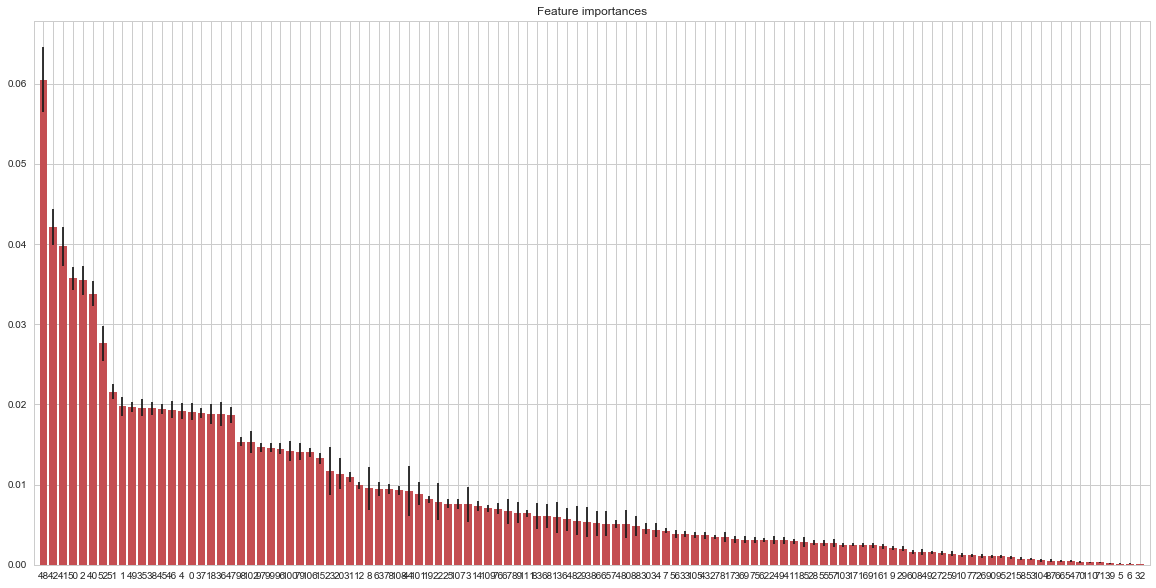

In [55]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
      color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [64]:
#recursive feature elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()
# create the RFE model and select 30 attributes
rfe = RFE(model, 30)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
#print(rfe)
#print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

C:\Users\Preethi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[68 79 62 67 73  1  1 45  1  3 29  1 49  5 66 64 33  1 31 47 19 38  1 12  7
 30  1 46 35 24 37 72  1 48  1 61 75 74 69  1 36 34  1 21  2 77 78 82 76 80
 83 43 54  1  1  1  1  1  1  1 27 28 25 18 52 57  1 58 53  6  1 10 14 13 59
  8  9 63 71 81 16 17  1  1 23  1  1  1  1  4 56 70 40 41 42 55 39 60 65 15
  1 11  1  1 26 44 20 51 22 32  1 50]
Index(['ADC', 'ADMTOT', 'AGE', 'AWEEKEND', 'BDTOT', 'CHC', 'CM_AIDS',
       'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH',
       ...
       'PAY1_3.0', 'PAY1_4.0', 'PAY1_5.0', 'PAY1_6.0', 'RACE_1.0', 'RACE_2.0',
       'RACE_3.0', 'RACE_4.0', 'RACE_5.0', 'RACE_6.0'],
      dtype='object', length=112)


In [80]:
d = {'var': X.columns , 'importance' : rfe.ranking_}
feature_imp_rfe = pd.DataFrame(data = d)

In [81]:
feature_imp_rfe

,importance,var
0,68,ADC
1,79,ADMTOT
2,62,AGE
3,67,AWEEKEND
4,73,BDTOT
5,1,CHC
6,1,CM_AIDS
7,45,CM_ALCOHOL
8,1,CM_ANEMDEF
9,3,CM_ARTH


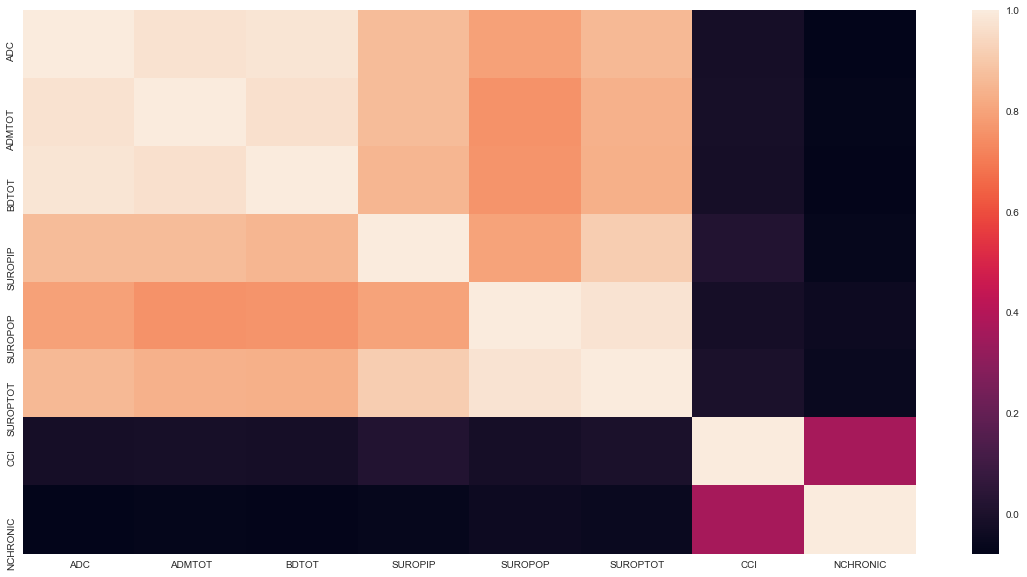

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(X[['ADC','ADMTOT','BDTOT','SUROPIP','SUROPOP','SUROPTOT','CCI','NCHRONIC']].corr())
plt.show()

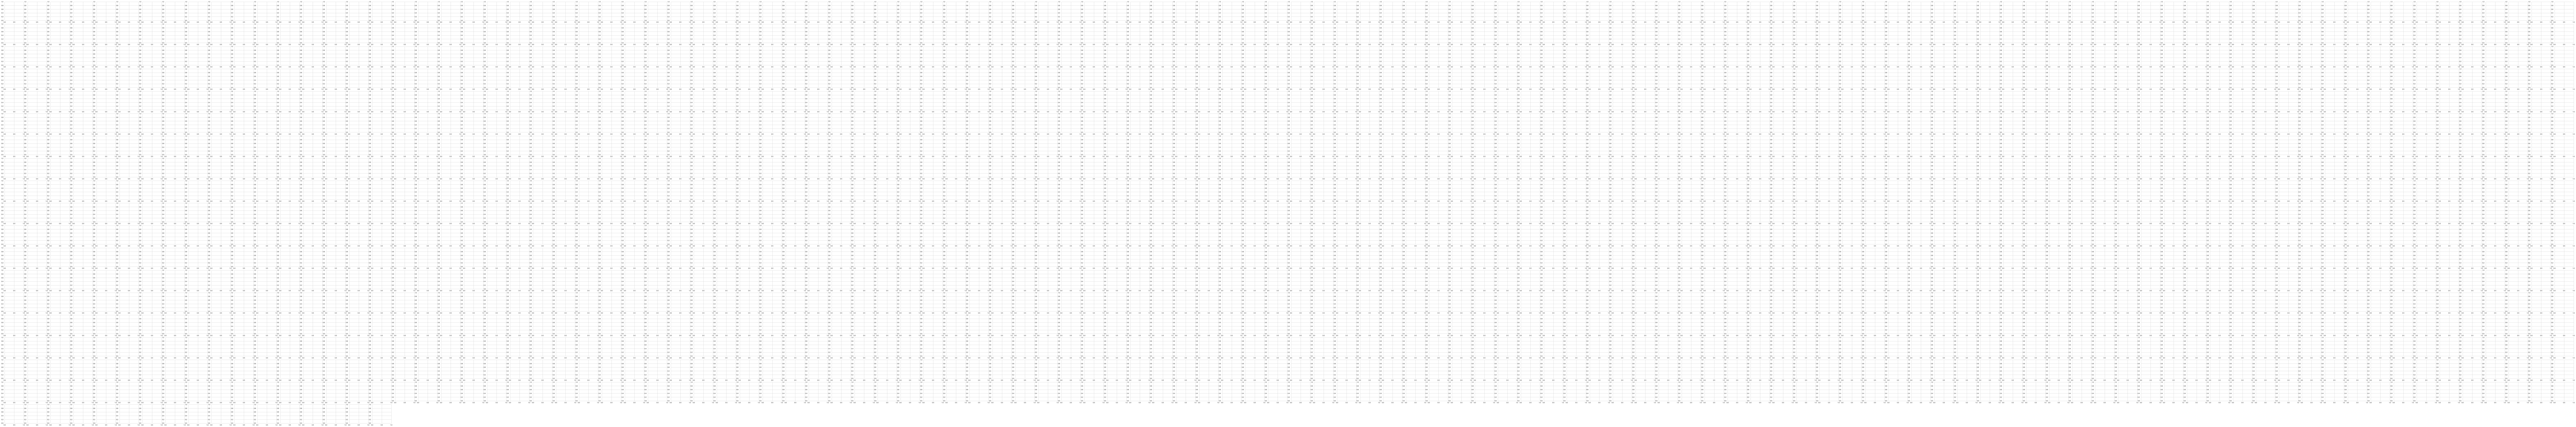

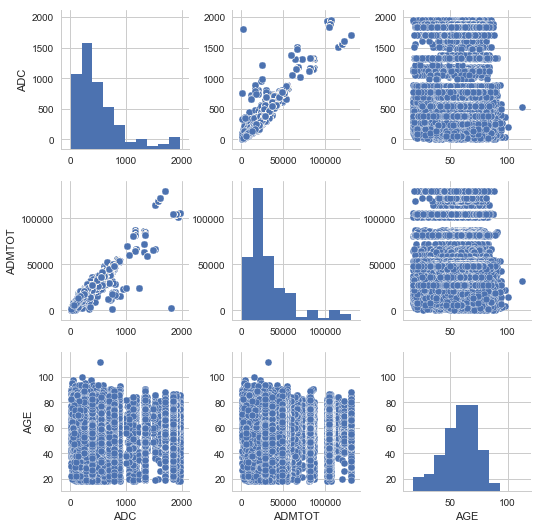

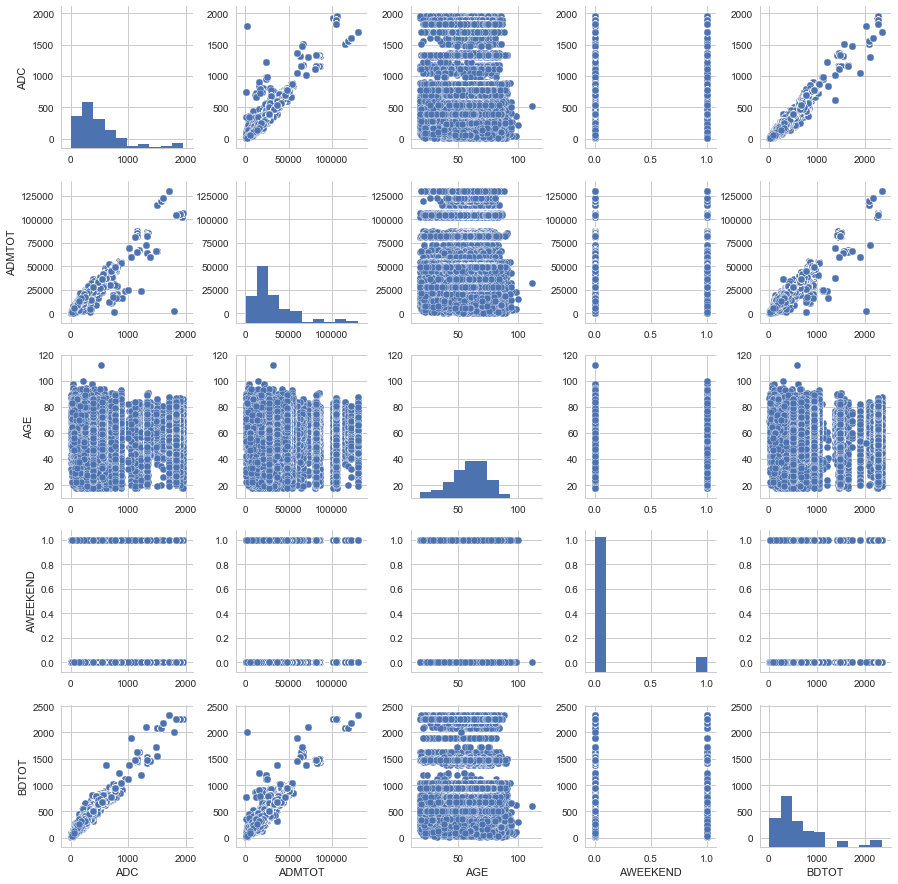

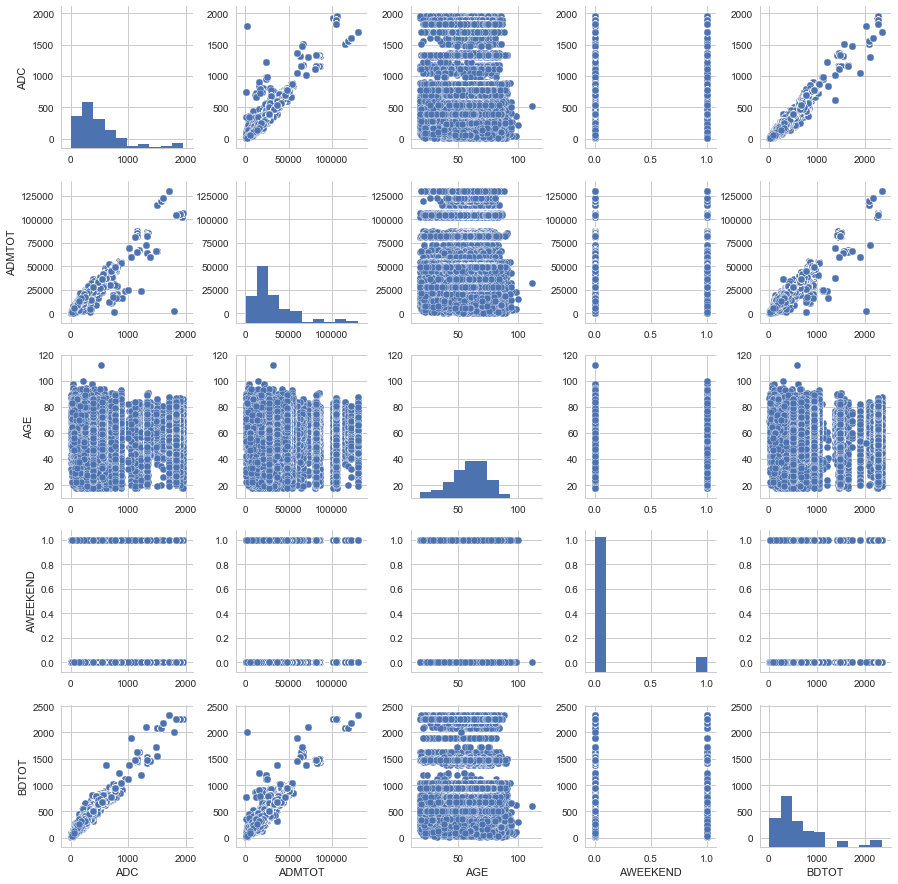

In [66]:
sns.pairplot(X.iloc[:,range(0,5)])
plt.show()

In [67]:
y.to_csv('C:/Users/preethi/Downloads/hack_train.csv',index=False)

In [71]:
df2.shape

(31283, 113)

In [69]:
df.to_csv('C:/Users/preethi/Downloads/clean.csv',index=False)

In [74]:
df[['ADC',
'ADMTOT',
'AGE',
'BDTOT',
'FTMDTF',
'FTRES',
'FTRNTF',
'NCHRONIC',
'NDX',
'NPR',
'SUROPIP',
'SUROPOP',
'SUROPTOT',
'TOTCHG_X'
]].describe()

,ADC,ADMTOT,AGE,BDTOT,FTMDTF,FTRES,FTRNTF,NCHRONIC,NDX,NPR,SUROPIP,SUROPOP,SUROPTOT,TOTCHG_X
count,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,3.128300e+04
mean,504.913371,32084.854426,58.755171,645.792827,174.708979,318.544577,1307.326695,4.402647,9.476009,3.386152,10482.905188,13621.138574,24104.043762,7.525248e+04
std,413.937023,25137.223522,14.740317,508.495655,343.847205,407.436866,1117.885653,2.681588,5.252218,3.077413,8057.328387,14653.984512,21650.588267,9.447213e+04
min,3.000000,192.000000,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.260000e+02
25%,224.000000,16327.000000,50.000000,315.000000,2.000000,4.000000,487.000000,2.000000,6.000000,1.000000,4329.000000,5418.000000,10199.000000,2.862550e+04
50%,386.000000,24515.000000,60.000000,470.000000,23.000000,139.000000,994.000000,4.000000,9.000000,3.000000,8303.000000,8321.000000,19233.000000,5.280561e+04
75%,698.000000,39957.000000,69.000000,806.000000,148.000000,476.000000,1847.000000,6.000000,13.000000,5.000000,13513.000000,15643.000000,28963.000000,8.606043e+04
max,1952.000000,130100.000000,112.000000,2338.000000,1907.000000,1688.000000,5284.000000,18.000000,45.000000,31.000000,49829.000000,87830.000000,112246.000000,2.665977e+06


In [155]:
data_train1_log.to_csv('C:/Users/preethi/Downloads/data_train_log.csv',index=False)

In [160]:
data_test_log.to_csv('C:/Users/preethi/Downloads/data_test_log.csv',index=False)

In [148]:
data_test_normal.to_csv('C:/Users/preethi/Downloads/data_test_normal.csv',index=False)

In [149]:
data_train1.to_csv('C:/Users/preethi/Downloads/data_train_normal.csv',index=False)

In [163]:
cost_df.to_csv('C:/Users/preethi/Downloads/cost_df.csv',index=False)